In [313]:
%matplotlib inline

import pandas as pd
import numpy as np

In [314]:
df = pd.read_csv("wms.csv", sep=",")
df.columns = [
    "client_id",
    "date",
    "time",
    "temparature",
    "pressure",
    "humidity",
    "wind_speed",
    "wind_direction",
    "rain",
]
df.replace("wwww", 0)
df.head(5)

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016-10-13,12:48:16,2747,91061.0,4265.0,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747,91022.0,4252.0,6.24,185.0,111111.0


In [315]:
df.shape

(1678, 9)

In [316]:
df.dtypes

client_id           int64
date               object
time               object
temparature        object
pressure          float64
humidity          float64
wind_speed         object
wind_direction    float64
rain              float64
dtype: object

In [317]:
df.describe()

,client_id,pressure,humidity,wind_direction,rain
count,1678.0,1668.000000,1678.000000,1678.000000,1677.000000
mean,10101.0,111061.177050,4721.179118,152.473021,80394.888849
std,0.0,101565.629728,949.395945,296.495726,46368.228269
min,10101.0,1.000000,-699.000000,-3.000000,0.000000
25%,10101.0,91031.750000,4474.000000,1.000000,11111.000000
50%,10101.0,91175.000000,4563.000000,192.000000,111111.000000
75%,10101.0,91272.000000,5657.000000,282.000000,111111.000000
max,10101.0,599109.000000,7253.000000,11111.000000,111111.000000


In [318]:
temp = []
for i in df.temparature:
    a = "{:4}".format(i)
    b = str("{}.{}".format(a[:2], a[2:]))
    temp.append(b)

In [319]:
df.temparature = pd.Series(temp)

In [320]:
df.head(5)

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016-10-13,12:48:16,27.47,91061.0,4265.0,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,27.47,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,27.47,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,27.47,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,27.47,91022.0,4252.0,6.24,185.0,111111.0


In [321]:
df_mean = df.groupby(['date'], axis=0,).mean().head(5)

In [322]:
df_max = df.groupby(['date'], axis=0,).max().head(5)

In [354]:
df_min = df.groupby(['date'], axis=0,).min().reset_index()

In [355]:
df_min.head(5)

,date,client_id,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,2002-11-16,10101,18:24:49,26.41,91138.00,4625.0,0,-1.0,111111.0
1,2016-10-13,10101,11:01:00,26.00,90020.00,4037.0,1,5.0,111111.0
2,2016-10-18,10101,12:19:35,25.75,90700.00,20.0,1,5.0,111111.0
3,2016-10-25,10101,03:05:48,27.47,78597.00,3450.0,1,0.0,111111.0
4,2016-10-26,10101,00:51:41,27.,910.32,34.5,0,0.0,111111.0


## Minimum value of pressure based on date

In [376]:
pres = [float("{:2.2f}".format(i)) for i in df_min.pressure.head(5)]
date = [i for i in df_min.date.head(5)]

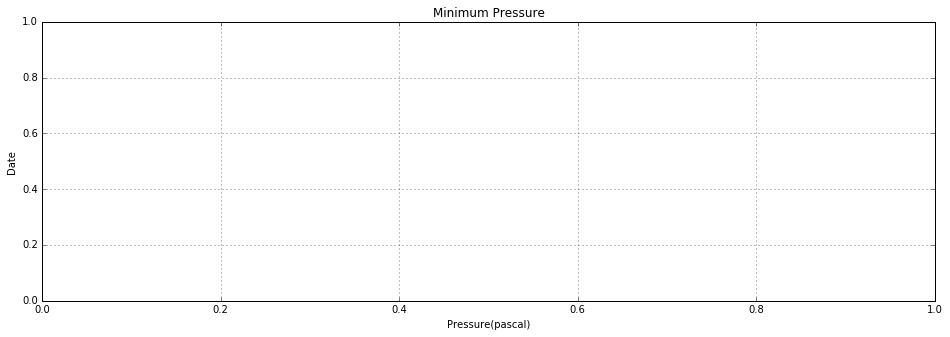

In [384]:
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(16, 5))

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Minimum Pressure')
ax.set_xlabel('Pressure(pascal)')
ax.set_ylabel('Date')
ax.fmt_xdata = date
ax.fmt_ydata = pres

plt.show()